In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns
import scipy

# Soft Clustering mit Gaussian Mixture Models

In [80]:
# erste Punktwolke
x_werte = np.random.normal(0,0.2,100)
y_werte = np.random.normal(3,0.2,100)

# zweite Punktwolke
x_werte_2 = np.random.normal(6,1,1000)
y_werte_2 = np.random.normal(6,1,1000)

# dritte Punktwolke
x_werte_3 = np.random.normal(0,0.2,1000)
y_werte_3 = np.random.normal(5,0.2,1000)

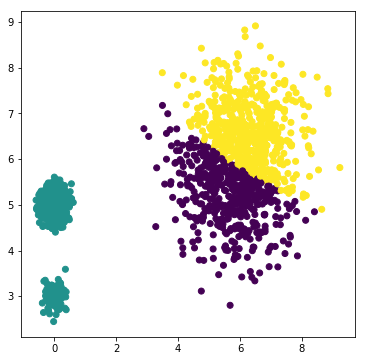

In [86]:
data_x = np.concatenate([x_werte, x_werte_2, x_werte_3])
data_y = np.concatenate([y_werte, y_werte_2, y_werte_3])

dataset = pd.DataFrame()

dataset['x'] = data_x
dataset['y'] = data_y

dataset.head()

x = np.array([1,1,1])

mixture = GaussianMixture(n_components=3, covariance_type='full').fit(dataset)

dataset['mixture_nr'] = mixture.predict(dataset)

# plotte ich diesen Datensatz mit 'scatter'
plt.figure(1, figsize=(6, 6))
plt.scatter(data_x, data_y, c=dataset['mixture_nr'])
plt.show();

# K-Means im Vergleich zu Gaussian Mixture Models

In [96]:
# erste Punktwolke
x_werte = np.random.normal(1,0.5,100)
y_werte = np.random.normal(3,0.5,100)

# zweite Punktwolke
x_werte_2 = np.random.normal(6,1,1000)
y_werte_2 = np.random.normal(6,1,1000)

# dritte Punktwolke
x_werte_3 = np.random.normal(1,0.5,1000)
y_werte_3 = np.random.normal(5,0.5,1000)

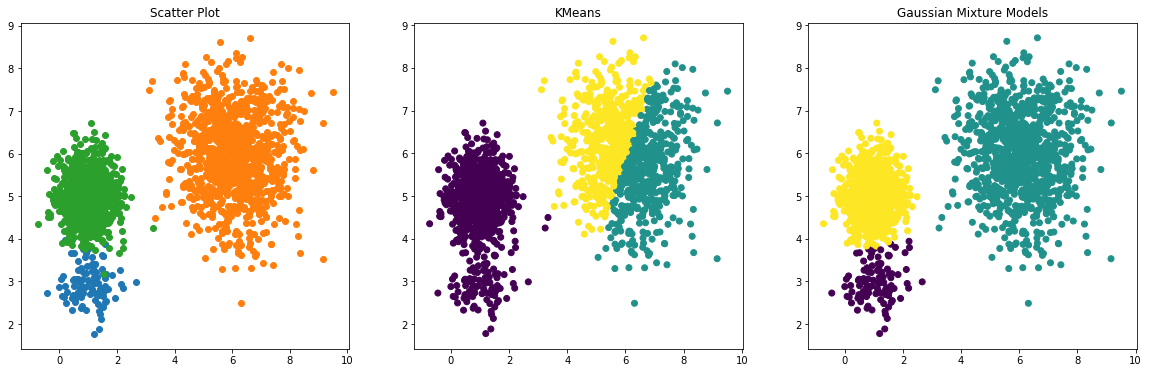

In [99]:
data_x = np.concatenate([x_werte, x_werte_2, x_werte_3])
data_y = np.concatenate([y_werte, y_werte_2, y_werte_3])

dataset = pd.DataFrame()
dataset['x'] = data_x
dataset['y'] = data_y

dataset2 = pd.DataFrame()
dataset2["x"] = data_x
dataset2["y"] = data_y

# KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init=100).fit(dataset)
dataset['cluster_nr'] = kmeans.predict(dataset)

# Gaussian Mixture Models
mixture = GaussianMixture(n_components=3, covariance_type='full', n_init=100).fit(dataset2)
dataset2['mixture'] = mixture.predict(dataset2)

# Nur Daten
plt.figure(1, figsize=(20, 6))
plt.subplot(1,3,1)
plt.scatter(x_werte, y_werte)
plt.scatter(x_werte_2, y_werte_2)
plt.scatter(x_werte_3, y_werte_3)
plt.title("Scatter Plot")

# Plot K-Means
plt.subplot(1,3,2)
plt.scatter(data_x, data_y, c=dataset['cluster_nr'])
plt.title("KMeans")

#Plot Gaussian Mixture Models
plt.subplot(1,3,3)
plt.scatter(data_x, data_y, c=dataset2['mixture'])
plt.title("Gaussian Mixture Models")

plt.show()

# Clustering der Ziffern anhand der Median-Werte jeder Ziffer